# Fouriertransformation: Verschiedene Signale in Zeit- und Frequenzbereich
*Interaktive Korrespondenztabelle mit Skalier- und Verschiebemöglichkeit*

Ausgewählt wird ein Signal $s(t)$, z.B. "Cosinus", was $s(t)=cos(2\pi t)$ entspricht.
Über die Slider $t_0$ und $T$ kann das Signal verschoben bzw. gestaucht/gestreckt werden. Dargestellt werden dann $s(\frac{t-t_0}{T})$ im Zeitbereich und die entsprechenden Spektren $Re(S(f)), Im(S(f)), |(S(f))|$ und $arg(S(f))$. Die Gewichtung von Dirac-Stößen wird in ihrer Länge und Richtung ausgedrückt.


Output()

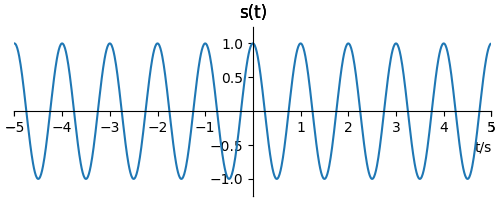

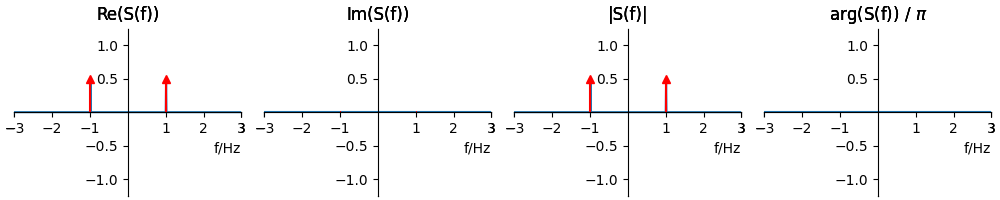

In [3]:
""" Portiert von Spektren.mlx

(c) Benno Dömer | HS Pforzheim
ToDo: ggf. noch statt plot() set_ydata einfügen - dürfte erheblich schneller sein.

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt


%matplotlib widget
#%matplotlib inline

from numpy import (pi, log10, exp, sqrt, sin, cos, sinc, tan, angle, arange, 
                   real, imag, linspace, zeros, ones)
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, legend,  
                               grid, xlabel, ylabel, subplot, title, clf, xlim, ylim)
from matplotlib.pyplot import fill_between as area 

fig1, ax1 = plt.subplots(figsize=(5, 2), dpi=100, layout='constrained',num='Zeitbereich')
#plt.show()
fig2, axs = plt.subplots(1,4,figsize=(10, 2), dpi=100, layout='constrained',num='Frequenzbereich')
#plt.show()

    

def plotDirac(ax,x,y):
    for n in range(min(len(x),len(y))):
        if y[n]>0.01:
            arrowmarker = "^"
        elif y[n]<-0.01:
            arrowmarker = "v"
        else:
            arrowmarker = ","
        ax.plot(np.array([x[n], x[n]]),np.array([0, y[n]]),color='red',linewidth=1.5)
        ax.plot(x[n], y[n],color='red',marker=arrowmarker)

def plotSignals(ax,x,y,x_lab=None,y_lab=None,x_lim=(-5,5), y_lim=(-1.25,1.25),f_title=None):
    ax.clear()
    ax.plot(x,y)
    if x_lab:
        ax.set_xlabel(x_lab,loc='right')
    if y_lab:
        ax.set_ylabel(y_lab,loc='top')
    if f_title:
        ax.set_title(f_title)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_xticks([-5,-4,-3,-2,-1,1,2,3,4,5])
    ax.set_yticks([-1,-0.5,0.5,1])
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)  

        
def plotAll(sig,t0,T):
    fA = 100 # Abtastrate für die Darstellung
    tmax = 5  
    t = arange(-tmax,tmax-1/fA, 1/fA)
    dx = np.array([]) #dirac xpos
    da = np.array([]) # dirac ampl
    fmax = 5
    df = 0.01
    f = arange(-fmax,fmax-df,df)
    L=len(f)
    if sig=="cos":
        s = cos(2*pi*(t - t0)/T);
        S=zeros(len(t));
        S[np.argmax(f>-1/T)]=0.5;
        S[np.argmax(f>1/T)]=0.5;
        dx = 1/T*np.array([-1,1]);
        da = np.array([0.5,0.5]);
    elif sig=="sin":
        s = sin(2*pi*(t - t0)/T);
        S=zeros(len(t))*1j;
        S[np.argmax(f>-1/T)]=0.5*1j;
        S[np.argmax(f>1/T)]=-0.5*1j;
        dx = 1/T*np.array([-1,1]);
        da = np.array([0.5*1j,-0.5*1j]);
    elif sig == "sinc":
        s = sinc((t - t0)/T);
        S=T*ones(len(t));
        S[np.where(f>0.5/T)]=0;
        S[np.where(f<-0.5/T)]=0;
    elif sig == "rect":
        s=ones(len(t));
        s[np.where(t<t0-0.5*T)]=0;
        s[np.where(t>t0+0.5*T)]=0;
        S=T*sinc(T*f)
    elif sig == "exp":
        s=exp(-(t - t0)/T)
        s[np.where(t<=t0)]=0
        S=T/(1+1j*2*pi*f*T)        
    elif sig == "expa":
        s=0.5*exp(-abs((t - t0)/T));
        #S=T/(1+(2*pi*f*T)^2);
        S=T/(1+(2*pi*f*T)**2);
    elif sig == "gauss":
        s=exp(-pi*((t - t0)/T)**2);
        S=T*exp(-pi*(f*T)**2);
    elif sig == "step":
        s=ones(len(t));
        s[np.where(t<t0)]=0;
        S=1/(1j*2*pi*f);
        #S(find(f>=0,1))=NaN;
        S[np.argmax(f>=0)]=np.nan;
        dx = np.array([0]);
        da = np.array([0.5]);
    elif sig == "swcos":
        s = cos(2*pi*(t - t0)/T);
        s[np.where(t<t0)]=0;
        S=T*-1j/2/pi*2*f*T/((f*T)**2-1);
        dx = 1/T*np.array([-1,1]);
        da = np.array([0.25,0.25]);
  

    S = np.multiply(S,exp(-1j*2*pi*f*t0))
    da = np.multiply(da,exp(-1j*2*pi*t0*dx))

    #fig1, ax1 = plt.subplots(figsize=(5, 2), dpi=100, layout='constrained',num='Zeitbereich')
    plt.figure('Zeitbereich')
    plotSignals(ax1,t,s,x_lim=(-5,5), x_lab='t/s',y_lim=(-1.25,1.25),f_title='s(t)')

    fmax=3;
    #fig2, axs = plt.subplots(1,4,figsize=(10, 2), dpi=100, layout='constrained',num='Frequenzbereich')
    plt.figure('Frequenzbereich')
    
    plotSignals(axs[0],f,real(S),x_lim=(-fmax,fmax),x_lab='f/Hz',f_title='Re(S(f))')
    plotDirac(axs[0],dx,real(da))
    
    plotSignals(axs[1],f,imag(S),x_lim=(-fmax,fmax),x_lab='f/Hz',f_title='Im(S(f))')
    plotDirac(axs[1],dx,imag(da))
    
    plotSignals(axs[2],f,abs(S),x_lim=(-fmax,fmax),x_lab='f/Hz',f_title='|S(f)|')
    plotDirac(axs[2],dx,abs(da))
    
    arg = angle(S)/pi
    arg[np.where(abs(S)==0)]=0
    plotSignals(axs[3],f,arg,x_lim=(-fmax,fmax),x_lab='f/Hz',f_title=r'arg(S(f)) / $\pi$')
    fig1.canvas.draw()
    fig2.canvas.draw()
    
#_ = widgets.interact(
#    plotAll, 
#    sig=['cos','sin','sinc','rect','exp','expa','gauss','step','swcos'],
#    t0=(-1,1,0.1),
#    T=(0.5, 2, 0.1)
#)

sigcombo = widgets.Dropdown(options=[('Cosinus','cos'),('Sinus','sin'),('Sinc','sinc'),
                                     ('Rect','rect'),('Exp-Impuls','exp'),('Exp-Impuls, beids.','expa'),('Gauss','gauss'),
                                     ('Sprung','step'),('Kausaler Cos','swcos')],value='cos',description='Signal')

t0slider = widgets.FloatSlider(min=-1, max=1, step=0.05, value=0, description='$t_0$')
Tslider  = widgets.FloatSlider(min=0.5, max=2, step=0.1, value=1, description='$T$')
ui = widgets.HBox([sigcombo, t0slider, Tslider])
ui.layout = widgets.Layout( border='solid 2px red')


out = widgets.interactive_output(plotAll, {'sig': sigcombo, 't0': t0slider, 'T': Tslider})
display(ui, out)
plt.figure(fig1)
plt.show()
plt.figure(fig2)
plt.show()

